### Linear Regression
** Modeling a Linear Relationship in Tensorflow **  
In this notebook we model the relationship between ground temperature and the chirping of crickets. The dataset is derived from a book "Songs of the Insects" written in 1948 by  G. W. Pierce.

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download data
#!wget -nv -O data/PierceCricketData.csv 'https://ibm.box.com/shared/static/reyjo1hk43m2x79nreywwfwcdd5yi8zu.csv'

** View Data ** 

In [3]:
datafile = pd.read_csv("data/PierceCricketData.csv")
datafile.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


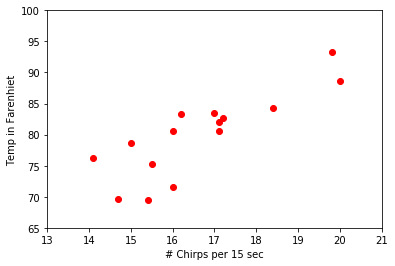

In [4]:
%matplotlib inline

x_data, y_data = (datafile["Chirps"].values,datafile["Temp"].values)

# plots the data points
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.axis([13,21,65,100])
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")


We can see a linear relationship in the data, and it is suitable to be fit to a linear equation of the form *Y = mX + b*  

** Creating a Tensorflow Graph **  
To implement linear regression, we first take an approximation for our m & b values, which we then will update. 

In [5]:
X = tf.placeholder(tf.float32,shape=(x_data.size))
Y = tf.placeholder(tf.float32,shape=(y_data.size))
m = tf.Variable(3.5)
b = tf.Variable(10.0)

O = tf.add(tf.multiply(X,m),b)
                

** Create and Run Tensorflow Session **

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
prediction = sess.run(O,feed_dict={X:x_data})


** View inital prediction **

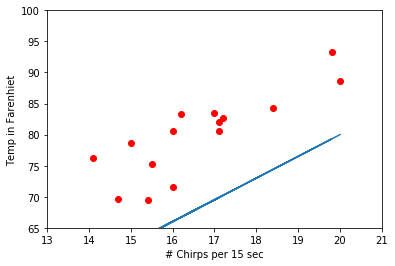

In [7]:
#plot initial prediction against datapoints
plt.plot(x_data, prediction)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.axis([13,21,65,100])
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

Our initial line is in the general area, but can obviously be improved. We accomplish this my looking at the differnce between our predictions and actual data points.

To quantitatively evaluate our performance, we define a loss function where O(X) is our prediction (output) and Y is the data value we are trying to fit.  

$$ loss = \frac{1}{n}\sum_{i=1}^n{[O_i - Y_i]^2} $$

Tensowflow has built in ops for many differnt loss functions, as well as optimizers for reducing loss. This particular loss function is the * mean square differnce. *

In [8]:
normalization = 0.1
loss = tf.reduce_mean(tf.squared_difference(O*normalization,Y*normalization))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.train.AdagradOptimizer(0.01)
train = optimizer.minimize(loss)

In [9]:
sess.run(tf.global_variables_initializer())

We now define a loop where we update our m & b values until the change is negligable.

In [10]:
min_update_difference = 0.0001
previous_m = 10000
previous_b = 10000
steps = []
losses = []
linear_fit = None 

In [11]:
for i in range(10000):
    _, _m , _b,_l = sess.run([train, m, b,loss],feed_dict={X:x_data,Y:y_data})
    steps.append((_m,_b))
    losses.append(_l)
    if (np.abs(previous_m - _m) <= min_update_difference): #or (np.abs(previous_b - _b) <= min_update_difference) :
        print("Finished. Equation found by linear regression: Y = {}X + {}".format(_m,_b))
        print("Loss: {}, Num steps: {}".format(_l,i))
        linear_fit = [_m * x + _b for x in x_data]
        break
    previous_m = _m
sess.close()    

Finished. Equation found by linear regression: Y = 4.04876708984375X + 10.537397384643555
Loss: 0.18839183449745178, Num steps: 1497


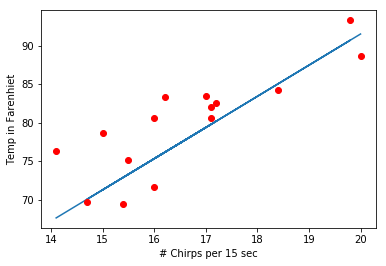

In [12]:
#plot final prediction against datapoints
plt.plot(x_data, linear_fit)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

And we have a better fit! We can view logs from linear regression that show how our loss decreases over iterations  

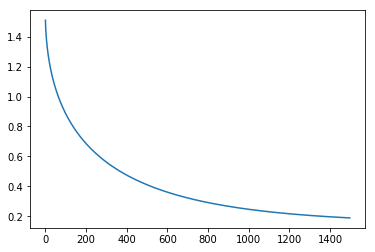

In [13]:
plt.plot(losses)

In [14]:
import matplotlib.animation

matplotlib.rc('animation', html='html5')

def plot_image(x_data,y_data,steps):
    num_steps = len(steps)
    num_frames = 50
    step_increment = np.floor(num_steps/num_frames)
    steps = [step for i,step in enumerate(steps) if i % step_increment == 0]
    ani_data = [x_data*m+b for m,b in steps]
    fig,ax = plt.subplots()
    #fig = plt.figure(figsize = (5,5))
    #ax = plt.subplot(1,1,1)
    line, = ax.plot([],[],'b-')
    ax.plot(x_data,y_data,'ro')
    def animate(i):
        line.set_data(x_data,ani_data[i])
        return line,
    return matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,len(ani_data)), interval=200, blit=True)


We can view the updates to our linear fit as an animation over iterations, notice how the line updates quickly at first then slows down as the gradients converge.  

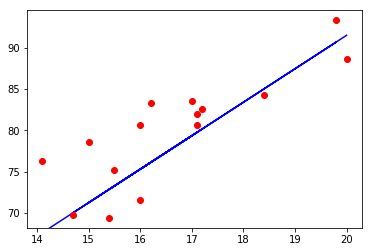

In [15]:
plot_image(x_data,y_data,steps)